In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy import load
%matplotlib inline

In [3]:
%cd /content/drive/MyDrive/simple_r2d2

/content/drive/MyDrive/simple_r2d2


# STEP_1: Clone r2d2 repository and Extract keypoint

In [ ]:
!git clone https://github.com/naver/r2d2.git

In [ ]:
!python /content/drive/MyDrive/simple_r2d2/r2d2/extract.py --model /content/drive/MyDrive/simple_r2d2/r2d2/models/r2d2_WASF_N16.pt --images /content/drive/MyDrive/simple_r2d2/images/image1.jpg --top-k 5000

In [ ]:
!python /content/drive/MyDrive/simple_r2d2/r2d2/extract.py --model /content/drive/MyDrive/simple_r2d2/r2d2/models/r2d2_WASF_N16.pt --images /content/drive/MyDrive/simple_r2d2/images/image2.jpg --top-k 5000

## STEP_2: match images

In [5]:
def draw_image_matches(img1_adress, img2_adress):
    img1 = plt.imread(img1_adress)
    img2 = plt.imread(img2_adress)
    data1 = load(img1_adress+str(".r2d2"))
    data2 = load(img2_adress+str(".r2d2"))
    des1 = data1['descriptors']
    kp1 = data1['keypoints']
    kp1 = np.delete(kp1,2,1)
    kp1 = cv2.KeyPoint_convert(kp1)
    des2 = data2['descriptors']
    kp2 = data2['keypoints']
    kp2 = np.delete(kp2,2,1)
    kp2 = cv2.KeyPoint_convert(kp2)
    bf = cv2.BFMatcher(crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.

    # Initialize lists
    list_kp1 = []
    list_kp2 = []

    # For each match...
    for mat in matches:
      # Get the matching keypoints for each of the images
      img1_idx = mat.queryIdx
      img2_idx = mat.trainIdx
      # x - columns
      # y - rows
      # Get the coordinates
      (x1, y1) = kp1[img1_idx].pt
      (x2, y2) = kp2[img2_idx].pt
      # Append to each list
      list_kp1.append((x1, y1))
      list_kp2.append((x2, y2))

    img_matches = cv2.drawMatches(np.uint8(img1), kp1, np.uint8(img2), kp2, matches[:], np.uint8(img2), flags=2)
    return img_matches, list_kp1, list_kp2

In [6]:
image1_adress = '/content/drive/MyDrive/simple_r2d2/images/image1.jpg'
image2_adress = '/content/drive/MyDrive/simple_r2d2/images/image2.jpg'

In [7]:
img_matches,list_kp1, list_kp2= draw_image_matches(image1_adress, image2_adress)

# STEP_3: Plot matched image

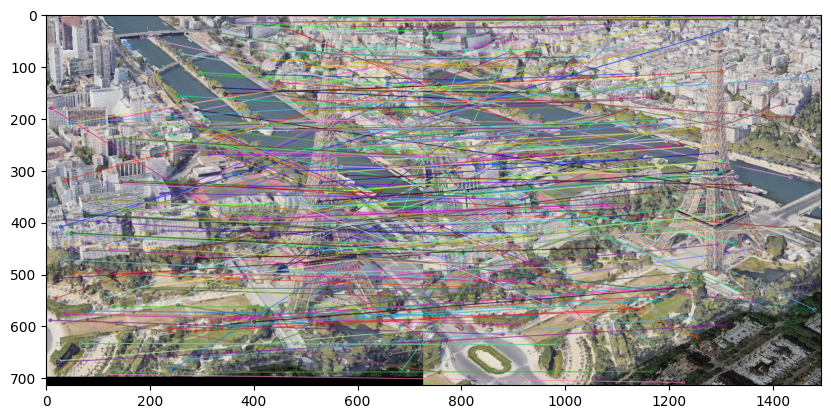

In [8]:
fig = plt.figure(figsize=(10, 8))
plt.imshow(img_matches)
plt.show()